<a href="https://colab.research.google.com/github/es-smaha/Twitter-NLP-Visualisation/blob/main/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk 
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import pandas as pd 
import numpy as np
import re 

nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()

In [ ]:
#!pip install git+https://github.com/twintproject/twint.git

In [ ]:
c = twint.Config()

# extracting data from twitter
c.Username = "WhiteHouse"
c.Lang="en"
c.Pandas= True

twint.run.Search(c)

1463131467421212672 2021-11-23 13:05:00 +0000 <WhiteHouse> Today, President Biden is announcing the Department of Energy will make available releases of 50 million barrels of oil from the Strategic Petroleum Reserve to lower gas and oil prices for Americans.    https://t.co/f6ifrIC8TW
1462927435482206214 2021-11-22 23:34:15 +0000 <WhiteHouse> The Build Back Better Act will lower costs that families struggle with, including prescription drugs, health care premiums, child care, and home care for seniors.
1462913815700463627 2021-11-22 22:40:07 +0000 <WhiteHouse> First Lady Jill Biden receives the Official White House Christmas Tree before it’s taken inside the residence to go up in the Blue Room.  https://t.co/7P5XGViPgl
1462913758024642565 2021-11-22 22:39:54 +0000 <WhiteHouse> Today, the Official White House Christmas Tree arrived at the White House, greeted by @FLOTUS and a D.C. Army National Guard Family.  https://t.co/pX2W3wYi5b
1462898686858567680 2021-11-22 21:40:00 +0000 <WhiteHo

In [ ]:
def columne_names():
  return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
  return twint.output.panda.Tweets_df[columns]
  

In [ ]:
data= twint_to_pd(["tweet"])
data.head(10)


,tweet
0,"Today, President Biden is announcing the Depar..."
1,The Build Back Better Act will lower costs tha...
2,First Lady Jill Biden receives the Official Wh...
3,"Today, the Official White House Christmas Tree..."
4,The Build Back Better Act will: -Help American...
5,The Build Back Better Act will create a Civili...
6,Happening Now: President Biden announces his n...
7,The Build Back Better Act is fully paid for. I...
8,"Thanks to President Biden’s economic plans, su..."
9,@POTUS Read the full announcement here: https...


In [ ]:
data.shape

(90, 1)

In [ ]:
data['tweet']

0     Today, President Biden is announcing the Depar...
1     The Build Back Better Act will lower costs tha...
2     First Lady Jill Biden receives the Official Wh...
3     Today, the Official White House Christmas Tree...
4     The Build Back Better Act will: -Help American...
                            ...                        
85    Additionally, our administration announced imm...
86    Recognizing the critical role American ports p...
87    Our transit infrastructure repair backlog incl...
88    Tune in for a briefing with Principal Deputy P...
89    Currently, up to 10M households and 400K schoo...
Name: tweet, Length: 90, dtype: object

In [ ]:
# split sentence 
All_sentences = []
for w in data['tweet']:
  All_sentences.append(w)
All_sentences

['Today, President Biden is announcing the Department of Energy will make available releases of 50 million barrels of oil from the Strategic Petroleum Reserve to lower gas and oil prices for Americans.    https://t.co/f6ifrIC8TW',
 'The Build Back Better Act will lower costs that families struggle with, including prescription drugs, health care premiums, child care, and home care for seniors.',
 'First Lady Jill Biden receives the Official White House Christmas Tree before it’s taken inside the residence to go up in the Blue Room.  https://t.co/7P5XGViPgl',
 'Today, the Official White House Christmas Tree arrived at the White House, greeted by @FLOTUS and a D.C. Army National Guard Family.  https://t.co/pX2W3wYi5b',
 'The Build Back Better Act will: -Help Americans get back to work by lowering the cost of child care and care for seniors -Create jobs manufacturing clean energy technology to help us meet our emissions goals -Cut taxes for working families And more.',
 'The Build Back Bet

In [ ]:
# split each line 
lines = []
for line in All_sentences:
  words = line.split()
  for l in words:
    lines.append(l)


In [ ]:
def cleanData(text):
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('\(.*?\)', '', text) 
    text = re.sub('\w*\d\w*', '', text) 
    text = re.sub('\n', '', text) 
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)
    return text

# remove punctuation 
lines = [cleanData(x) for x in lines]
lines

['Today',
 'President',
 'Biden',
 'is',
 'announcing',
 'the',
 'Department',
 'of',
 'Energy',
 'will',
 'make',
 'available',
 'releases',
 'of',
 '',
 'million',
 'barrels',
 'of',
 'oil',
 'from',
 'the',
 'Strategic',
 'Petroleum',
 'Reserve',
 'to',
 'lower',
 'gas',
 'and',
 'oil',
 'prices',
 'for',
 'Americans',
 '',
 'The',
 'Build',
 'Back',
 'Better',
 'Act',
 'will',
 'lower',
 'costs',
 'that',
 'families',
 'struggle',
 'with',
 'including',
 'prescription',
 'drugs',
 'health',
 'care',
 'premiums',
 'child',
 'care',
 'and',
 'home',
 'care',
 'for',
 'seniors',
 'First',
 'Lady',
 'Jill',
 'Biden',
 'receives',
 'the',
 'Official',
 'White',
 'House',
 'Christmas',
 'Tree',
 'before',
 'its',
 'taken',
 'inside',
 'the',
 'residence',
 'to',
 'go',
 'up',
 'in',
 'the',
 'Blue',
 'Room',
 '',
 'Today',
 'the',
 'Official',
 'White',
 'House',
 'Christmas',
 'Tree',
 'arrived',
 'at',
 'the',
 'White',
 'House',
 'greeted',
 'by',
 'FLOTUS',
 'and',
 'a',
 'DC',
 'Arm

In [ ]:
lines2 = []
for word in lines:
  if word!= '':
    lines2.append(word)
lines2

['Today',
 'President',
 'Biden',
 'is',
 'announcing',
 'the',
 'Department',
 'of',
 'Energy',
 'will',
 'make',
 'available',
 'releases',
 'of',
 'million',
 'barrels',
 'of',
 'oil',
 'from',
 'the',
 'Strategic',
 'Petroleum',
 'Reserve',
 'to',
 'lower',
 'gas',
 'and',
 'oil',
 'prices',
 'for',
 'Americans',
 'The',
 'Build',
 'Back',
 'Better',
 'Act',
 'will',
 'lower',
 'costs',
 'that',
 'families',
 'struggle',
 'with',
 'including',
 'prescription',
 'drugs',
 'health',
 'care',
 'premiums',
 'child',
 'care',
 'and',
 'home',
 'care',
 'for',
 'seniors',
 'First',
 'Lady',
 'Jill',
 'Biden',
 'receives',
 'the',
 'Official',
 'White',
 'House',
 'Christmas',
 'Tree',
 'before',
 'its',
 'taken',
 'inside',
 'the',
 'residence',
 'to',
 'go',
 'up',
 'in',
 'the',
 'Blue',
 'Room',
 'Today',
 'the',
 'Official',
 'White',
 'House',
 'Christmas',
 'Tree',
 'arrived',
 'at',
 'the',
 'White',
 'House',
 'greeted',
 'by',
 'FLOTUS',
 'and',
 'a',
 'DC',
 'Army',
 'National'

In [ ]:
#stemming words to their root 

s_stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines2:
  stem.append(s_stemmer.stem(word))



In [ ]:
#remove all the stop words
stem2=[]

for word in stem:
  if word not in nlp.Defaults.stop_words:
    stem2.append(word)
stem2

['today',
 'presid',
 'biden',
 'announc',
 'depart',
 'energi',
 'avail',
 'releas',
 'million',
 'barrel',
 'oil',
 'strateg',
 'petroleum',
 'reserv',
 'lower',
 'gas',
 'oil',
 'price',
 'american',
 'build',
 'better',
 'act',
 'lower',
 'cost',
 'famili',
 'struggl',
 'includ',
 'prescript',
 'drug',
 'health',
 'care',
 'premium',
 'child',
 'care',
 'home',
 'care',
 'senior',
 'ladi',
 'jill',
 'biden',
 'receiv',
 'offici',
 'white',
 'hous',
 'christma',
 'tree',
 'befor',
 'taken',
 'insid',
 'resid',
 'blue',
 'room',
 'today',
 'offici',
 'white',
 'hous',
 'christma',
 'tree',
 'arriv',
 'white',
 'hous',
 'greet',
 'flotus',
 'dc',
 'armi',
 'nation',
 'guard',
 'famili',
 'build',
 'better',
 'act',
 'help',
 'american',
 'work',
 'lower',
 'cost',
 'child',
 'care',
 'care',
 'senior',
 'creat',
 'job',
 'manufactur',
 'clean',
 'energi',
 'technolog',
 'help',
 'meet',
 'emiss',
 'goal',
 'cut',
 'tax',
 'work',
 'famili',
 'build',
 'better',
 'act',
 'creat',
 'civ

In [ ]:
#store data to a dataframe

df = pd.DataFrame(stem2)
df = df[0].value_counts()
df

infrastructur    48
presid           37
bipartisan       37
biden            31
law              28
                 ..
entri             1
central           1
young             1
weather           1
enabl             1
Name: 0, Length: 570, dtype: int64

In [ ]:
#frequency of the words 
freqdoc = FreqDist()
for words in df:
  freqdoc[words]+=1

freqdoc



FreqDist({1: 290,
          2: 118,
          3: 49,
          4: 37,
          5: 14,
          6: 12,
          7: 5,
          8: 9,
          9: 10,
          11: 3,
          12: 6,
          15: 5,
          16: 1,
          17: 2,
          19: 1,
          20: 2,
          25: 1,
          28: 1,
          31: 1,
          37: 2,
          48: 1})

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

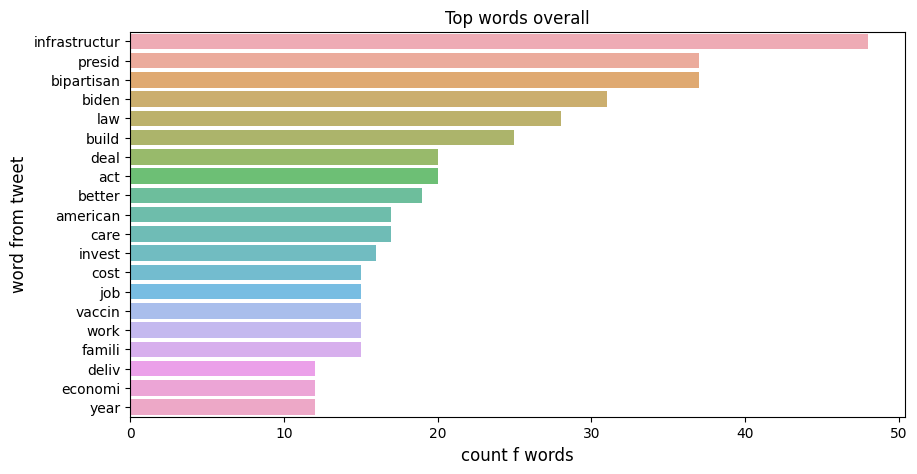

In [ ]:
df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values , df.index , alpha =0.8)
plt.title('Top words overall')
plt.ylabel('word from tweet', fontsize=12)
plt.xlabel('count f words', fontsize=12)
plt.show

In [ ]:
import spacy 
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = spacy.load('en_core_web_sm') 

In [ ]:
def show(doc):
  if doc.ents:
    for ent in doc.ents:
      print(ent.text + '-' + ent.label_ +'-'+str(spacy.explain(ent.label_)))

#s doc property is used for the named entities in the document
#ent.text = give us the entity 
#ent.label_  give us the name for exaple ORG


In [ ]:
doc = nlp("trump")
show(doc)


In [ ]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


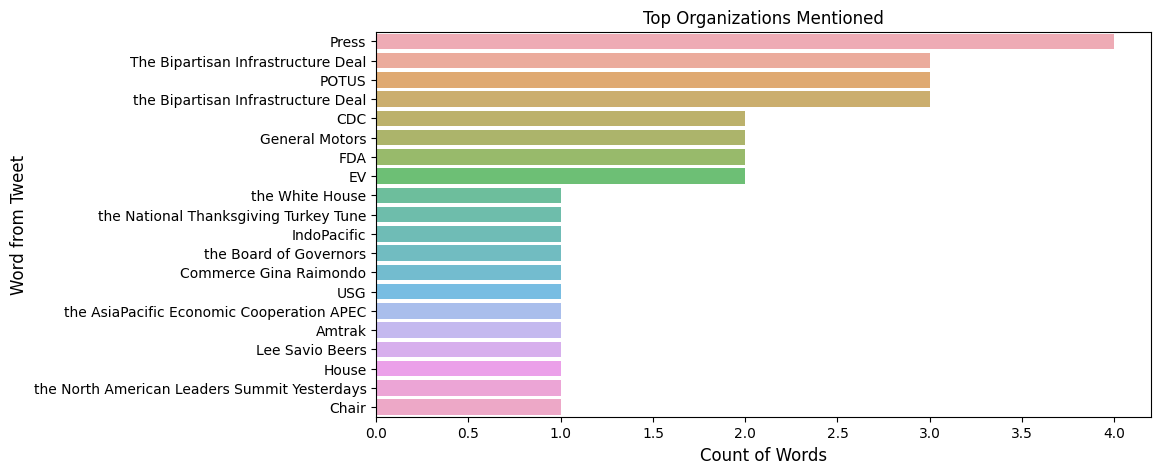

In [ ]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()